In [ ]:
#let's train a linear regression model using this data "dm_office_sales.csv"
#for that we will first separate out X ie features from label ie y
#then we will Train/Test split the data
#we don't need to normalize continuous valued output column/target label
#as that's what we want to predict in the real-world, hence don't change its value
#then we will fit a normalization model on feature vectors only of Train data ir X_Train by calling fit()
#as we do not want to assume any information from the Test dataset otherwise it will result in data leakage
#we do not want any information leaking from the Test dataset or pre-conceived distribution of Test set, 
# so we use fit() method of StandardScaler for X_Train only
# Then it basically learns mean and standard deviation of Train dataset, to scale X_train values feature wise mean centered 
#use this Normalizer object on feature vectors only of Test data ie X_Test by calling transform() 
#as we want to handle pre-processing of X_Train/X_Test using handled similar methods
#our objective is to predict sales using 5 input features where first 2 features are categorical, and next 3 features are numeric
#also each numeric feature is measuring things under different units

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("dm_office_sales.csv")

In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [4]:
df.shape

(1000, 6)

In [5]:
X=df.iloc[:,:-1] #.values
y=df.iloc[:,-1] #.values #turn df to NumPy array

In [ ]:
#help(train_test_split)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=402)
#if we want to compare multiple ml models, they must have same train/test split, random state =same no ensures it.

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder=OneHotEncoder(sparse_output=False,drop='first')
#drop=first to avoid dummy variable trap
scaler=StandardScaler()


In [8]:
X_train

,division,level of education,training level,work experience,salary
726,office supplies,bachelor's degree,2,7,97227
397,printers,associate's degree,1,3,74037
128,computer software,associate's degree,1,10,115164
207,office supplies,some college,2,4,81063
741,office supplies,associate's degree,2,9,111905
...,...,...,...,...,...
990,printers,some college,0,3,68353
202,printers,associate's degree,2,10,122390
326,office supplies,some college,1,4,77702
6,peripherals,associate's degree,0,5,77548


In [9]:
#fit OHE categorical columns for X_train
encoder.fit(X_train[['division','level of education']])

OneHotEncoder(drop='first', sparse_output=False)

In [10]:
#Scale numeric values column wise for X_train
scaler.fit(X_train[['training level','work experience','salary']])

StandardScaler()

In [11]:
#once you fit OHE encoder and scaler on X_train, use it to get transformed X_train vectors
encoded_data_ohe=encoder.transform(X_train[['division','level of education']])

In [12]:
encoded_data_ohe.shape

(700, 8)

In [13]:
X_train_numeric_scaled=scaler.transform(X_train[['training level','work experience','salary']])

In [14]:
X_train_numeric_scaled.shape

(700, 3)

In [15]:
#to concatenate column-wise 2 numpy arrays
X_train_transf=np.hstack((encoded_data_ohe,X_train_numeric_scaled))

In [16]:
X_train_transf.shape


(700, 11)

In [71]:
# OR using concatenate
#X_train_transf = np.concatenate((encoded_data_ohe, X_train_numeric_scaled), axis=1)

In [17]:
# Now repeat same pre-processing steps for X_Test to avoid any data leaking
#for deployment you will get Test data separately
encoded_data_ohe_test=encoder.transform(X_test[['division','level of education']])
X_test_numeric_scaled=scaler.transform(X_test[['training level','work experience','salary']])
X_test_transf=np.hstack((encoded_data_ohe_test,X_test_numeric_scaled))


In [18]:
X_test_transf.shape

(300, 11)

In [28]:
y_test.shape

(300,)

In [27]:
y_train.shape

(700,)

In [22]:
#we need to normalize y_train and y_test too 
#otherwise unstable training wiould result
#all input features are in same range -2 to 2 or 0 to 1
#let's normalize target label now
scaler1=StandardScaler()
#scaler1.fit(y_train) 
# gives error as scaler1 is expecting a 2-D matrix with one column
#as target label is just one column

# Reshape y_train to 2D before fitting
y_train_scaled = scaler1.fit_transform(y_train.values.reshape(-1, 1)) #turning column vector to 2D

# Transform y_test using the fitted scaler
y_test_scaled = scaler1.transform(y_test.values.reshape(-1, 1))

In [26]:
y_train_scaled.shape

(700, 1)

In [25]:
y_test_scaled.shape

(300, 1)

In [29]:
from sklearn.neural_network import MLPRegressor

In [30]:
model=MLPRegressor(hidden_layer_sizes=(100,100),activation='relu',solver='adam',random_state=402,max_iter=10000,learning_rate='invscaling',verbose=True,learning_rate_init=0.0001,batch_size=8,)

In [31]:
model.fit(X_train_transf,y_train_scaled)

d:\msc_dwm_lab_2024\msc_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.44643295
Iteration 2, loss = 0.23760895
Iteration 3, loss = 0.11001492
Iteration 4, loss = 0.05313426
Iteration 5, loss = 0.03731309
Iteration 6, loss = 0.03354823
Iteration 7, loss = 0.03169736
Iteration 8, loss = 0.03024903
Iteration 9, loss = 0.02907169
Iteration 10, loss = 0.02832941
Iteration 11, loss = 0.02747975
Iteration 12, loss = 0.02689712
Iteration 13, loss = 0.02640222
Iteration 14, loss = 0.02590389
Iteration 15, loss = 0.02559326
Iteration 16, loss = 0.02519748
Iteration 17, loss = 0.02502286
Iteration 18, loss = 0.02453283
Iteration 19, loss = 0.02425221
Iteration 20, loss = 0.02400512
Iteration 21, loss = 0.02391244
Iteration 22, loss = 0.02375725
Iteration 23, loss = 0.02346230
Iteration 24, loss = 0.02328079
Iteration 25, loss = 0.02333175
Iteration 26, loss = 0.02287830
Iteration 27, loss = 0.02274305
Iteration 28, loss = 0.02257989
Iteration 29, loss = 0.02254288
Iteration 30, loss = 0.02241546
Iteration 31, loss = 0.02233065
Iteration 32, los

MLPRegressor(batch_size=8, hidden_layer_sizes=(100, 100),
             learning_rate='invscaling', learning_rate_init=0.0001,
             max_iter=10000, random_state=402, verbose=True)

In [32]:
model.hidden_layer_sizes

(100, 100)

In [33]:
model.n_features_in_

11

In [34]:
model.n_outputs_

1

In [38]:
y_pred_scaled=model.predict(X_test_transf)

In [39]:
y_pred_scaled.shape

(300,)

In [40]:
y_pred_scaled

array([-2.09393923e-01,  2.10178304e-01, -1.04790232e+00,  4.41539453e-02,
       -7.85374532e-01,  3.16476157e-01,  8.36847565e-01,  7.69827449e-01,
        1.34926193e+00, -1.00925920e+00,  2.17793987e+00, -4.59875638e-01,
        3.16626715e-01, -1.26042510e+00, -6.17267812e-02,  8.19485926e-01,
       -1.05451536e+00,  1.71060632e-01,  1.15212620e-01, -5.00616338e-01,
        1.04012520e+00,  9.95489120e-01, -1.39976759e+00, -7.72112167e-01,
        1.10294767e-01,  1.01337084e-01,  4.89264371e-01, -1.12517299e+00,
       -1.53109835e+00, -1.28426984e+00, -1.67195636e+00, -1.45844198e-01,
       -5.28662295e-01,  4.39052009e-01,  1.16951377e+00,  1.30565724e+00,
       -4.80764652e-01,  2.51541816e-01,  7.71648356e-01, -7.06182973e-01,
       -4.18830008e-02, -1.39482260e+00, -9.02722594e-01,  3.92441196e-01,
        9.92638659e-02,  2.12383553e+00,  2.36912241e-01,  1.04559263e-01,
       -1.40964809e-01,  1.07211323e+00, -1.08203387e+00,  2.49041208e-01,
        2.60168315e-01, -

In [42]:
y_test_scaled

array([[ 2.10312927e-02],
       [ 4.33524923e-02],
       [-1.37431902e+00],
       [ 1.41989799e-01],
       [-6.01062006e-01],
       [ 5.45001260e-01],
       [ 4.72659280e-01],
       [ 1.08904379e+00],
       [ 1.22943238e+00],
       [-1.22088831e+00],
       [ 2.30402559e+00],
       [-5.85642757e-01],
       [ 6.07779633e-01],
       [-1.03336086e+00],
       [-1.67377253e-01],
       [ 7.45956302e-01],
       [-9.90379704e-01],
       [ 4.07642611e-02],
       [ 3.06461796e-01],
       [-4.01382723e-01],
       [ 1.48253753e+00],
       [ 9.82586716e-01],
       [-1.49480944e+00],
       [-8.35755836e-01],
       [-2.40407592e-01],
       [ 9.67967130e-02],
       [ 3.46882258e-01],
       [-1.03147935e+00],
       [-1.48812777e+00],
       [-1.24349403e+00],
       [-1.40025640e+00],
       [ 2.05318861e-01],
       [ 3.07416321e-01],
       [ 6.04071671e-01],
       [ 1.00790916e+00],
       [ 1.20786379e+00],
       [-6.07927244e-01],
       [ 6.75013055e-03],
       [ 1.4

In [43]:
y_test_scaled.shape

(300, 1)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score

In [45]:
mean_absolute_error(y_test_scaled,y_pred_scaled)

0.20718959452932106

In [46]:
mean_squared_error(y_test_scaled,y_pred_scaled)

0.07010889532759852

In [47]:
root_mean_squared_error(y_test_scaled,y_pred_scaled)

0.2647808439589211

Each blue dot represents an (actual, predicted) pair.
Red dashed line represents the perfect fit (ideal case where y_pred = y_actual).
R² Score (R-squared) indicates how well the model explains variance:
R² = 1 → Perfect fit.
R² > 0.9 → Very good model.
R² ≈ 0.5 → Moderate fit.
R² < 0.2 → Poor fit.

In [48]:
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f"R-squared: {r2:.3f}")

R-squared: 0.928


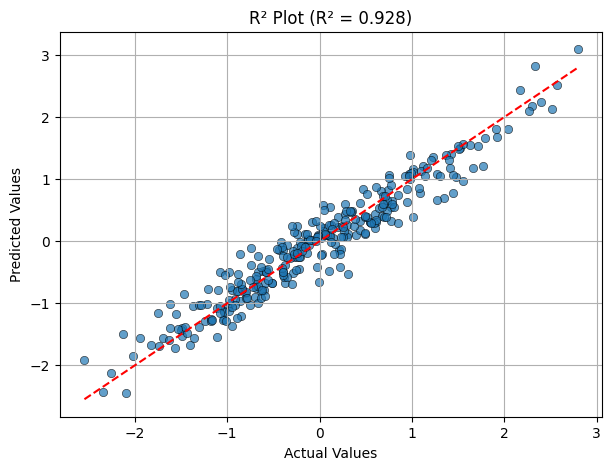

In [54]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test_scaled.flatten(), y=y_pred_scaled.flatten(), alpha=0.7, edgecolor='k')  # Scatter plot of actual vs predicted
sns.lineplot(x=y_test_scaled.flatten(), y=y_test_scaled.flatten(), color='red', linestyle='--')  # Ideal 1:1 line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"R² Plot (R² = {r2:.3f})")
plt.grid(True)
plt.show()

In [95]:
from joblib import dump,load

In [ ]:
#saving the model for future use
dump(model,'model_mlr_final.joblib')

['model_lr_final.joblib']

In [ ]:
#loading it some other day for a new set of test data for deployment purposes
loaded_model_mlr=load('model_lr_final.joblib')

In [58]:
y_pred_scaled.shape

(300,)

In [ ]:
# Convert predictions back to original scale
y_pred_original = scaler1.inverse_transform(y_pred_scaled.reshape(-1,1))
#why scaler1, as we fit it on y_train data after reshaping it in 1 column

In [61]:
y_pred_original

array([[318332.08559488],
       [364046.45922944],
       [226972.63968822],
       [345957.32208508],
       [255576.28068667],
       [375628.11188435],
       [432325.03188454],
       [425022.87407931],
       [488154.9940629 ],
       [231182.99022603],
       [578443.36644013],
       [291040.92094261],
       [375644.51587903],
       [203817.28013521],
       [334421.11738699],
       [430433.39949881],
       [226252.11742692],
       [359784.40431541],
       [353699.49999737],
       [286602.02951213],
       [454473.08952009],
       [449609.7778469 ],
       [188635.25843192],
       [257021.27799828],
       [353163.67664565],
       [352187.69485598],
       [394454.20304397],
       [218553.63523708],
       [174326.15237018],
       [201219.28300368],
       [158979.00757772],
       [325256.12793579],
       [283546.29009591],
       [388983.32927795],
       [468570.5845018 ],
       [483404.05838706],
       [288764.96432676],
       [368553.2090243 ],
       [4252

In [ ]:
# Convert y_train_scaled back to original scale
y_train_original = scaler1.inverse_transform(y_train_scaled.reshape(-1,1))
#why scaler1, as we fit it on y_train data after reshaping it in 1 column

In [63]:
y_train_original

array([[392294.],
       [229792.],
       [421642.],
       [336413.],
       [459575.],
       [161487.],
       [269439.],
       [227550.],
       [347759.],
       [500953.],
       [408114.],
       [465434.],
       [412769.],
       [156285.],
       [267850.],
       [525901.],
       [266012.],
       [246951.],
       [316600.],
       [312922.],
       [282658.],
       [379232.],
       [419102.],
       [338025.],
       [296565.],
       [344820.],
       [428507.],
       [397455.],
       [452481.],
       [449967.],
       [366251.],
       [274065.],
       [395169.],
       [291589.],
       [427319.],
       [499277.],
       [407879.],
       [240209.],
       [259653.],
       [410532.],
       [358823.],
       [177953.],
       [251868.],
       [ 99149.],
       [488197.],
       [338670.],
       [611764.],
       [265357.],
       [396174.],
       [606125.],
       [357145.],
       [461618.],
       [100614.],
       [204175.],
       [241531.],
       [57

In [64]:
y_train

726    392294
397    229792
128    421642
207    336413
741    459575
        ...  
990    175274
202    537245
326    255115
6      230899
389    350057
Name: sales, Length: 700, dtype: int64